In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
from ails_miccai_uwf4dr_challenge.dataset import DatasetBuilder, CustomDataset
from ails_miccai_uwf4dr_challenge.augmentations import rotate_affine_flip_choice, resize_only
from torchvision.transforms import v2
import torch
import matplotlib.pyplot as plt
import numpy as np
from ails_miccai_uwf4dr_challenge.config import PROJ_ROOT

### Original dataset

In [91]:
train_transforms = rotate_affine_flip_choice
val_transforms = resize_only

In [92]:
train, val = DatasetBuilder(dataset='all', task='full', split_ratio=0.5).get_train_val()

In [93]:
train_data = CustomDataset(train, transform=train_transforms)
val_data = CustomDataset(val, transform=val_transforms)

Dataset length:  318
Dataset length:  318


In [94]:
num = np.random.randint(len(train_data))
img, label = train_data[num]
print(img.shape)

# original dataset image shape: [3, 800, 1016]
# DeepDRiD dataset image shape: [3, 3072, 3900]

torch.Size([3, 800, 1016])


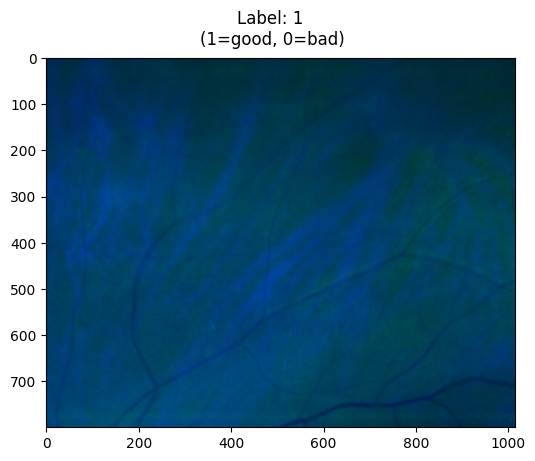

In [108]:
num = np.random.randint(len(train_data))
img, label = train_data[num]

plt.imshow(img.permute(1,2,0))
plt.suptitle(f'Label: {int(label.item())} \n(1=good, 0=bad)')
plt.show()

#### DeepDRiD

In [7]:
transforms = v2.Compose([
    v2.ToPILImage(),
    v2.ToImage(), 
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomResizedCrop(size=(512, 512), scale=(0.8, 1.0)),
])

train, val = DatasetBuilder(dataset='deepdrid', task='full').get_train_val()
train_data = CustomDataset(train, transform=train_transforms)
val_data = CustomDataset(val, transform=val_transforms)

Dataset length:  161
Dataset length:  41


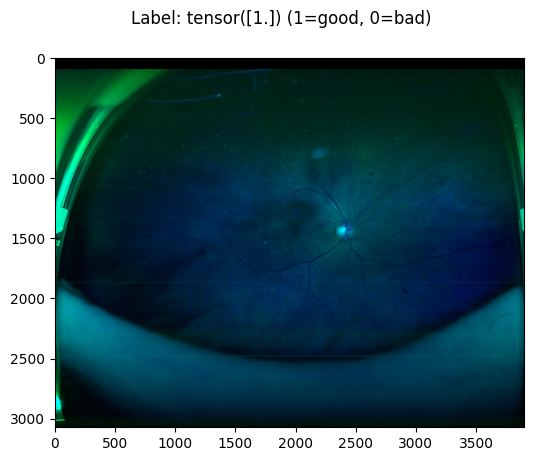

In [8]:

num = np.random.randint(len(train_data))
img, label = train_data[num]

plt.imshow(img.permute(1,2,0))
plt.suptitle(f'Label: {label} (1=good, 0=bad)')
plt.show()